# Path Planning

Created by Kevin J. Walchko 25 July 2017

----

Based off Sabastian Thur's Robotic course, Udacity.com and some good material from Red Games.

## References

- [Standford DARPA Grand Challenge](https://www.youtube.com/watch?v=qXZt-B7iUyw)
- [RedGames blog, deep dive on A\*](http://www.redblobgames.com/pathfinding/a-star/implementation.html)
- [RedGames blog, Intro to A\*](http://www.redblobgames.com/pathfinding/a-star/introduction.html)

## Background

In computer science, A\* (pronounced as "A star") is a computer algorithm that is widely used in pathfinding and graph traversal, the process of plotting an efficiently directed path between multiple points, called nodes. It enjoys widespread use due to its performance and accuracy. However, in practical travel-routing systems, it is generally outperformed by algorithms which can pre-process the graph to attain better performance, although other work has found A* to be superior to other approaches.

Peter Hart, Nils Nilsson and Bertram Raphael of Stanford Research Institute (now SRI International) first described the algorithm in 1968. It is an extension of Edsger Dijkstra's 1959 algorithm. A\* achieves better performance by using heuristics to guide its search. [Wikipedia](https://en.wikipedia.org/wiki/A*_search_algorithm)

In [157]:
%matplotlib inline

In [159]:
from __future__ import division, print_function
import matplotlib.pyplot as plt

def putPathMap(grid, path, clear=0, closed=2, travel=1):
    # copy map
    ret = [[(clear if grid[col][row] == 0 else closed) for row in range(len(grid[0]))] for col in range(len(grid))]
    
    # plot path on map
    for x, y in path:
        ret[x][y] = travel
    return ret

# Print stuff to command line, useful for debugging on robot
def printMap(rmap):
    rows = len(rmap)
    cols = len(rmap[0])
    form = []
    for i in rmap[0]:
        form.append('{:>4}')
    form = ' '.join(form)
    
    print("")
    print('--[ Map {} x {} ]----------'.format(rows, cols))
    for line in rmap:
        print(form.format(*line))

        
def printPath(path, grid):
    ret = putPathMap(grid, path, clear=' ', closed='X', travel='*')
    printMap(ret)
    

# make pretty plots
def matShow(grid, title=None, cmap=None, path=None):
    if path:
        path = putPathMap(path)
    rows = len(grid)
    cols = len(grid[0])
    
    colorbar = True
    if cmap is None:
        cmap = 'binary'
        colorbar = False
    plt.matshow(grid, cmap=plt.get_cmap(cmap))
    if title:
        plt.title(title + ' [{} x {}]'.format(rows, cols))
    else:
        plt.title('[{} x {}]'.format(rows, cols))
    plt.xticks(())
    plt.yticks(());
    if colorbar:
        plt.colorbar();

        
def getPath(expand, goal, start, wall=-1):
    path = []
    x, y = goal
    val = expand[x][y]
    delta = [
        [-1, 0 ], # go up
        [ 0, -1], # go left
        [ 1, 0 ], # go down
        [ 0, 1 ]  # go right
    ]
    done = False
    max_x_grid = len(grid)
    max_y_grid = len(grid[0])
    
    path.append(goal)
    
    while not done:
        vals = []
        for move in delta:
            x2, y2 = x + move[0], y + move[1]
            # make sure still on map
            if x2 >= 0 and x2 < max_x_grid and y2 >=0 and y2 < max_y_grid:
                if expand[x2][y2] > wall:  # don't travel through walls
                    val = expand[x2][y2]
                    vals.append((val, move))

        lowest = 100000
        for v, m in vals:
            if v < lowest:
                move = m
                lowest = v

        x, y = x + move[0], y + move[1]
        path.append([x, y])
        
        if x == start[0] and y == start[1]:
            done = True
        
    return path

## Simple Search

This method searches through an entire map and determines the cost of moving from the starting point.

`simpmle_search`:

- grid: the map
- init: the starting point
- goal: where you want to get too
- cost: movement cost

In [142]:
def simple_search(grid,init,goal,cost):
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1
    
    open = [[0, init[0], init[1]]]
    
    delta = [[-1, 0], # go up
             [ 0,-1], # go left
             [ 1, 0], # go down
             [ 0, 1]] # go right

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
    
    while not found and not resign:
        if len(open) == 0:
            print('<<< Fail: cannot find path to goal >>>')
            resign = True
        else:
            # remove node from list
            open.sort()  # sorts from small to large
            open.reverse()  # reverses: large to small
            next = open.pop()  # removes last element (smallest number)
            g, x, y = next
            
            if x == goal[0] and y == goal[1]:
                found = True
                print('found:', next)
            else:
                # cycle through possible movements
                for d in delta:
                    x2, y2 = x+d[0], y+d[1]
                    if x2 >= 0 and x2 < len(grid) and y2 >= 0 and y2 < len(grid[0]):
#                         print('checking:', x2, y2)
                        # check unoccupied
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost  # increment g value
                            open.append([g2, x2, y2])
                            closed[x2][y2] = g2

    return closed

found: [15, 4, 5]
start [0, 0]
goal [4, 5]


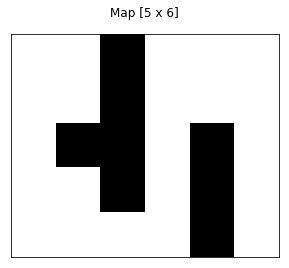

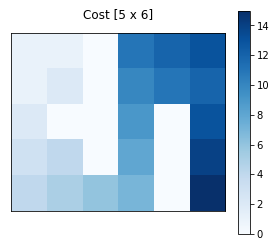

In [153]:
grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0]
       ]

init = [0, 0]
goal = [4, 5]

# delta = [[-1, 0], # go up
#          [ 0,-1], # go left
#          [ 1, 0], # go down
#          [ 0, 1]] # go right

# grid2 = [[0, 1, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0]]

goal2 = [len(grid)-1, len(grid[0])-1]
matShow(grid, title='Map')
cost = simple_search(grid, init, goal, 1)
matShow(cost, title='Cost', cmap="Blues")
print('start', init)
print('goal', goal)
path = getPath(ans, goal, init,0)

In [50]:
# def printPath(path, grid):
#     delta_name = ['^', '<', 'v', '>']
    
#     # copy map
#     ret = [[(' ' if grid[col][row] == 0 else 'X') for row in range(len(grid[0]))] for col in range(len(grid))]
    
#     # plot path on map
#     for x, y in path:
#         ret[x][y] = '*'
#     printMap(ret)

In [156]:
printMap(grid)
printPath(path, grid)


--[ Map 5 x 6 ]----------
   0    0    1    0    0    0
   0    0    1    0    0    0
   0    1    1    0    1    0
   0    0    1    0    1    0
   0    0    0    0    1    0

--[ Map 5 x 6 ]----------
   *         X               
   *         X    *    *    *
   *    X    X    *    X    *
   *    *    X    *    X    *
        *    *    *    X    *


## A\*

blah ...

In [29]:
def a_star(grid,init,goal,cost,heuristic):
    # ----------------------------------------
    # modify the code below
    # ----------------------------------------
    closed = [[0 for col in range(len(grid[0]))] for row in range(len(grid))]
    closed[init[0]][init[1]] = 1

    expand = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]
    action = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]
    
    
    delta = [[-1, 0], # go up
             [ 0,-1], # go left
             [ 1, 0], # go down
             [ 0, 1]] # go right

    x, y = init
    g = 0
    h = heuristic[x][y]
    f = g + h

    open = [[f, g, x, y]]  # add f

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
    count = 0
    
    while not found and not resign:
        if len(open) == 0:
            resign = True
            return "Fail"
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[2]
            y = next[3]
            g = next[1]
            expand[x][y] = count
            count += 1
            
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                # expand winning element and add to new open list
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    # make sure still on map
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        # make sure unoccuppied
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            h2 = heuristic[x2][y2]
                            f2 = g2 + h2
                            open.append([f2, g2, x2, y2])
                            closed[x2][y2] = 1

    return expand

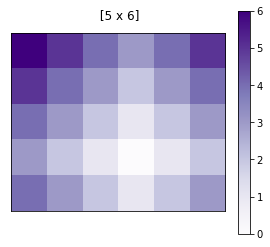

In [151]:
def calcHeuristic(grid, goal):
    """
    Basically calculates a gradient decent from a given
    goal point.
    """
    w = len(grid[0])  # width
    h = len(grid)     # height
    hr = [[(abs(goal[1]-y)+abs(goal[0]-x)) for y in range(w)] for x in range(h)]
    return hr

g = [3, 3]
hr = calcHeuristic(grid, g)
matShow(hr, cmap='Purples')

In [71]:
grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]]

printMap(grid)
# heuristic = [[9, 8, 7, 6, 5, 4],
#              [8, 7, 6, 5, 4, 3],
#              [7, 6, 5, 4, 3, 2],
#              [6, 5, 4, 3, 2, 1],
#              [5, 4, 3, 2, 1, 0]]

init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
heuristic = calcHeuristic(grid, goal)
cost = 1
ans = a_star(grid,init,goal,cost,heuristic)
printMap(ans)
print('start', init)
print('goal', goal)
path = getPath(ans, goal, init)
printPath(path, grid)



--[ Map 5 x 6 ]----------
   0    1    0    0    0    0
   0    1    0    0    0    0
   0    1    0    0    0    0
   0    1    0    0    0    0
   0    0    0    0    1    0

--[ Map 5 x 6 ]----------
   0   -1   -1   -1   -1   -1
   1   -1   -1   -1   -1   -1
   2   -1   -1   -1   -1   -1
   3   -1    8    9   10   11
   4    5    6    7   -1   12
start [0, 0]
goal [4, 5]

--[ Map 5 x 6 ]----------
   *    X                    
   *    X                    
   *    X                    
   *    X         *    *    *
   *    *    *    *    X    *


Now the thing to notice is, the heuristic pulls the path planner towards the goal like a rubber band. It drives to search algorithm to the end and avoids exploring unnecessary space in the map. This can be seen in the middle plot, where there are -1's in open space because it wasn't explored.

In [74]:
grid = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
        [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

# heuristic = [[abs(x+y) for y in range(-len(grid[0])+1, 1)] for x in range(-len(grid)+1, 1)]
goal = [len(grid)-1, len(grid[0])-1]
heuristic = calcHeuristic(grid, goal)
printMap(heuristic)


# go back to the preivous simple search
# h_empty = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
# heuristic = h_empty

ans = a_star(grid,init,goal,cost,heuristic)
printMap(ans)
print('start', init)
print('goal', goal)
path = getPath(ans, goal, init)
printPath(path, grid)


--[ Map 8 x 12 ]----------
  18   17   16   15   14   13   12   11   10    9    8    7
  17   16   15   14   13   12   11   10    9    8    7    6
  16   15   14   13   12   11   10    9    8    7    6    5
  15   14   13   12   11   10    9    8    7    6    5    4
  14   13   12   11   10    9    8    7    6    5    4    3
  13   12   11   10    9    8    7    6    5    4    3    2
  12   11   10    9    8    7    6    5    4    3    2    1
  11   10    9    8    7    6    5    4    3    2    1    0

--[ Map 8 x 12 ]----------
   0    1    3    5    8   10   13   16   21   23   26   30
   2   -1    6   -1   -1   -1   17   -1   24   27   31   36
   4   -1   -1   -1   -1   -1   22   -1   28   32   37   42
   7   -1   -1   -1   -1   -1   25   -1   33   38   43   48
   9   11   14   18   -1   -1   29   34   39   44   49   -1
  12   -1   19   -1   -1   -1   35   40   45   50   -1   -1
  15   -1   -1   -1   -1   -1   41   46   51   -1   -1   -1
  20   -1   -1   -1   -1   -1   47   52   53

<div style="background-color: #0066ff; color: white;">
<p style="padding:2em;">hi</p>
</div>

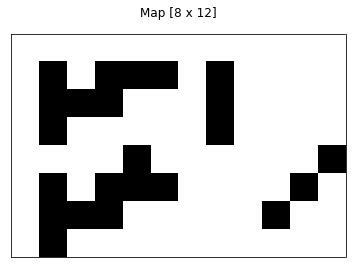

In [137]:
matShow(grid, 'Map')

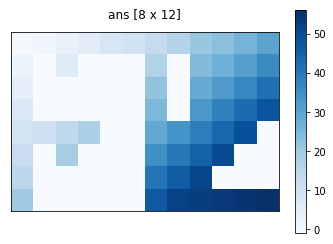

In [138]:
matShow(ans, 'ans', cmap='Blues')

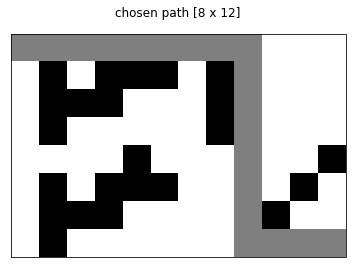

In [139]:
matShow(o, 'chosen path')